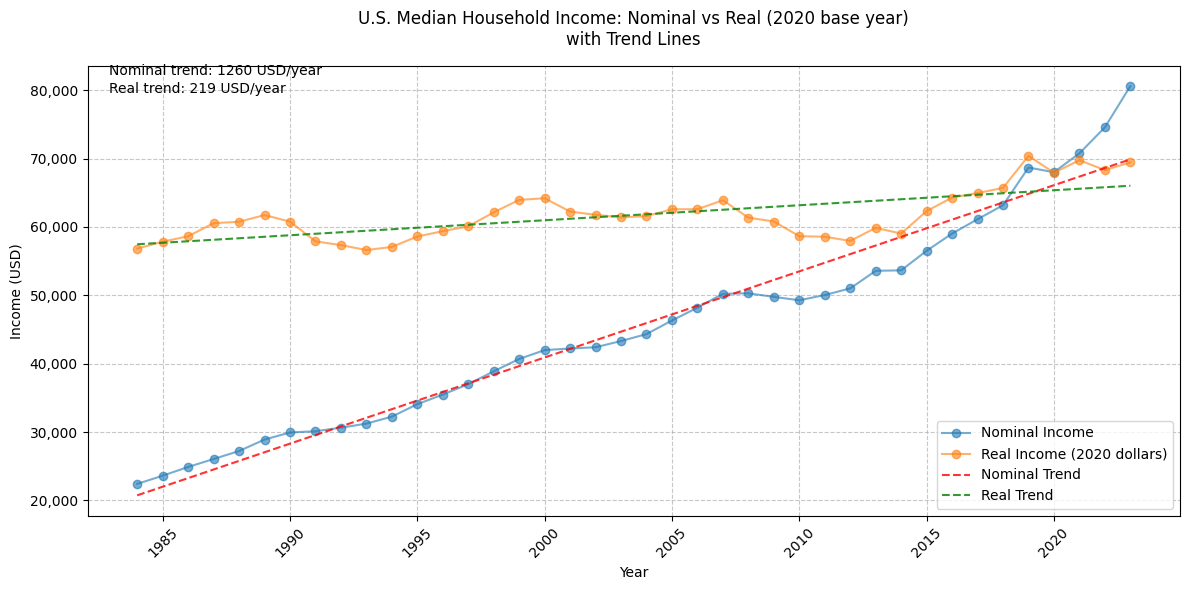


Summary Statistics:
Latest Nominal Income (USD): 80,610.00
Latest Real Income (2020 USD): 69,448.98

Trend Analysis:
Nominal Income Trend: +$1,260.16 per year
Real Income Trend: +$219.48 per year


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Read the CSV files
cpi_df = pd.read_csv('/Users/chen2636/Desktop/AAE625/Assesment2/CPIAUCSL.csv')
income_df = pd.read_csv('/Users/chen2636/Desktop/AAE625/Assesment2/MEHOINUSA646N.csv')

# Convert dates to datetime
cpi_df['observation_date'] = pd.to_datetime(cpi_df['observation_date'])
income_df['observation_date'] = pd.to_datetime(income_df['observation_date'])

# Get CPI value for 2020 (base year)
cpi_2020 = cpi_df[cpi_df['observation_date'].dt.year == 2020]['CPIAUCSL'].mean()

# Calculate price index (2020 = 100)
cpi_df['price_index'] = (cpi_df['CPIAUCSL'] / cpi_2020) * 100

# Merge CPI data with household income
merged_df = pd.merge(income_df, cpi_df[['observation_date', 'price_index']], 
                    on='observation_date', how='left')

# Calculate real income (in 2020 dollars)
merged_df['real_income'] = (merged_df['MEHOINUSA646N'] / merged_df['price_index']) * 100

# Create numerical x-axis for trend line fitting
merged_df['year_num'] = merged_df['observation_date'].dt.year
x = merged_df['year_num'].values
x_smooth = np.linspace(x.min(), x.max(), 100)

# Fit trend lines
nominal_z = np.polyfit(x, merged_df['MEHOINUSA646N'], 1)
nominal_p = np.poly1d(nominal_z)

real_z = np.polyfit(x, merged_df['real_income'], 1)
real_p = np.poly1d(real_z)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(merged_df['observation_date'], merged_df['MEHOINUSA646N'], 
         'o-', label='Nominal Income', alpha=0.6)
plt.plot(merged_df['observation_date'], merged_df['real_income'], 
         'o-', label='Real Income (2020 dollars)', alpha=0.6)

# Plot trend lines
plt.plot(pd.date_range(start=merged_df['observation_date'].min(), 
                      end=merged_df['observation_date'].max(), 
                      periods=100),
         nominal_p(x_smooth), '--', color='red', 
         label='Nominal Trend', alpha=0.8)
plt.plot(pd.date_range(start=merged_df['observation_date'].min(), 
                      end=merged_df['observation_date'].max(), 
                      periods=100),
         real_p(x_smooth), '--', color='green', 
         label='Real Trend', alpha=0.8)

# Calculate and display trend line equations
nominal_slope = nominal_z[0]
real_slope = real_z[0]

plt.text(0.02, 0.98, f'Nominal trend: {nominal_slope:.0f} USD/year', 
         transform=plt.gca().transAxes, fontsize=10)
plt.text(0.02, 0.94, f'Real trend: {real_slope:.0f} USD/year', 
         transform=plt.gca().transAxes, fontsize=10)

# Customize the plot
plt.title('U.S. Median Household Income: Nominal vs Real (2020 base year)\nwith Trend Lines', 
         fontsize=12, pad=15)
plt.xlabel('Year')
plt.ylabel('Income (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format y-axis labels with comma separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Print summary statistics and trend analysis
print("\nSummary Statistics:")
print(f"Latest Nominal Income (USD): {merged_df['MEHOINUSA646N'].iloc[-1]:,.2f}")
print(f"Latest Real Income (2020 USD): {merged_df['real_income'].iloc[-1]:,.2f}")
print(f"\nTrend Analysis:")
print(f"Nominal Income Trend: +${nominal_slope:,.2f} per year")
print(f"Real Income Trend: +${real_slope:,.2f} per year")